# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.

> Instructor Notes:
- This walks the students through a sample dataset, they should actually do it on the full dataset they have created as part of Project 6.
- The code for this lab is shorter than usual in order to give the students time to practice with Tableau.

## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../../assets/datasets/imdb_p6_sample.csv')
df.head()

,HA,rating,tconst,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0
2,762879,9.0,tt0071562,The Godfather: Part II,1974,1,1,0,0,1,0,0,1
3,1616346,9.0,tt0468569,The Dark Knight,2008,1,1,1,0,1,0,1,1
4,835155,8.9,tt0108052,Schindler's List,1993,1,1,1,1,1,1,1,1


In [3]:
y = df.rating
X = df.loc[:,'year':]

In [4]:
X['year'] = MinMaxScaler().fit_transform(X.year.astype(float).reshape(-1,1))

In [5]:
X

,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,0.750000,0,1,0,1,0,0,0,1
1,0.406250,1,1,0,0,1,0,1,0
2,0.437500,1,1,0,0,1,0,0,1
3,0.968750,1,1,1,0,1,0,1,1
4,0.734375,1,1,1,1,1,1,1,1
5,0.171875,1,0,0,0,0,0,0,0
6,0.750000,0,0,0,0,0,0,1,0
7,0.890625,1,0,0,1,0,0,0,1
8,0.312500,0,0,0,0,0,1,1,0
9,0.828125,0,1,0,0,0,1,0,0


## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

In [6]:
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [7]:
cv=KFold(len(y), shuffle=False)
dt = DecisionTreeRegressor(random_state=5)
dtScore = cross_val_score(dt, X,y, cv=cv, verbose=True)

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [8]:
dtScore.mean()

-21.646296296296402

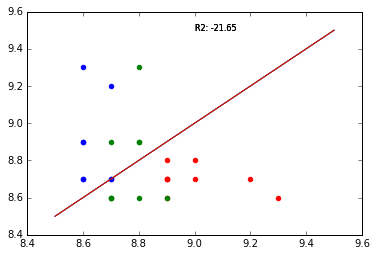

In [9]:
def do_plot(model, m=None):
    for fold, color in zip(cv, ['r', 'g', 'b']):
        X_train = X.iloc[fold[0]]
        X_test = X.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        plt.scatter(y_test, y_pred, color = color)
        plt.plot([8.5,9.5],[8.5,9.5])
        plt.text(9,9.5, "R2: "+str(m), fontsize=8, )
        
do_plot(dt, dtScore.mean().round(2))
#This needs axes labels since we can' asily tell which are the predicted and which are the actual values

## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

In [10]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [11]:
rf = RandomForestRegressor(random_state=5)
rfScore = cross_val_score(rf, X,y, cv=cv)
rfScore
print rfScore.mean(), dtScore.mean()

-12.0154259259 -21.6462962963


## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [12]:
ab = AdaBoostRegressor(random_state=5)

abScore = cross_val_score(ab, X,y, cv=cv)
abScore
print abScore.mean(), rfScore.mean(), dtScore.mean()

-13.9735418533 -12.0154259259 -21.6462962963


Random Forest classifier has the lowest error, meaning it is getting closer to correct scores.

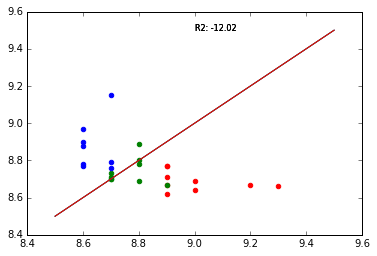

In [13]:
do_plot(rf, rfScore.mean().round(2))

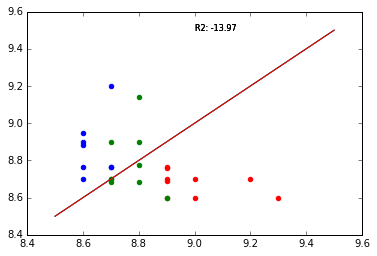

In [14]:
do_plot(ab, abScore.mean().round(2))

random forest has the best fit overall

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

## 5. Tableau Practice

Practice using Tableau to inspect the data and also to plot the results.


## Bonus

Take the best model and try to improve it using grid search.